#Methodology
Predict whether a customer will subscribe to a term deposit (y = yes / no) before the bank initiates a call, in order to decide on a call or don’t-call decision.

#Problem Framing
##Business View
1.   Calling customers is costly
2.   Successful subscriptions generate revenue
3.   The bank wants to prioritise customers with greater likelihood of subscription.

##Analytics View
1.   Target variable 'y' is binary
2.   Labels are observed after the campaign
3.   Input variables describe demographics, financial status and previous interactions with customers.

#Conclusion
This is a supervised binary classification problem where false positives and false negatives have different consequences on the business.

#Tree Based Model
How Decision Tree Helps:
1. They capture non-linear relationships.
2. They model feature interactions.
3. They handle mixed data types.
4. They align well with rule-based decision making.



###Common model: Logistic Regression + tweaks

In [ ]:
import pandas as pd
df = pd.read_csv('/content/bank_clean.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,month,campaign,previous,y,previously_contacted
0,58,management,married,tertiary,no,2143,yes,no,unknown,may,1,0,no,no
1,44,technician,single,secondary,no,29,yes,no,unknown,may,1,0,no,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,may,1,0,no,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,may,1,0,no,no
4,33,unknown,single,unknown,no,1,no,no,unknown,may,1,0,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,nov,3,0,yes,no
45207,71,retired,divorced,primary,no,1729,no,no,cellular,nov,2,0,yes,no
45208,72,retired,married,secondary,no,5715,no,no,cellular,nov,5,3,yes,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,nov,4,0,no,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   45211 non-null  int64 
 1   job                   45211 non-null  object
 2   marital               45211 non-null  object
 3   education             45211 non-null  object
 4   default               45211 non-null  object
 5   balance               45211 non-null  int64 
 6   housing               45211 non-null  object
 7   loan                  45211 non-null  object
 8   contact               45211 non-null  object
 9   month                 45211 non-null  object
 10  campaign              45211 non-null  int64 
 11  previous              45211 non-null  int64 
 12  y                     45211 non-null  object
 13  previously_contacted  45211 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.8+ MB


In [ ]:
for col in df.columns:
  print(f'{col}: {df[col].unique()}')

age: [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
balance: [ 2143    29     2 ...  8205 14204 16353]
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
campaign: [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
previous: [  0   3   1   4   2  11  16   6   5  10  12   7  18   9  21   8  14  15
  26  37  13  25  20  27  17

In [ ]:
for col in df.columns:
  print(f'\n{col}:\n{df[col].value_counts()}')


age:
age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
95       2
93       2
92       2
88       2
94       1
Name: count, Length: 77, dtype: int64

job:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

marital:
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

education:
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

default:
default
no     44396
yes      815
Name: count, dtype: int64

balance:
balance
0        3514
1         195
2         156
4         139
3         134
         ... 
14204       1
8205        1
9710        1
7038        1
4416        1
Name: count, Length: 7168, dtype: int64

housing:
housing
yes    25

In [ ]:
df.dropna(inplace=True)

To ensure the model is trained on high-quality, verified demographic data, 'unknown' entries were removed. This provides a clearer profile of the target customer, even though it reduces the sample size.

In [ ]:
#RUN THIS!
for col in df.columns:
  df = df[df[col] != 'unknown']

In [ ]:
for col in df.columns:
  print(f'\n{col}:\n{df[col].value_counts()}')


age:
age
32    1543
33    1485
34    1433
31    1424
30    1325
      ... 
89       3
90       2
95       2
88       2
94       1
Name: count, Length: 75, dtype: int64

job:
job
management       7329
technician       5563
blue-collar      5535
admin.           3536
services         2628
retired          1673
self-employed    1154
entrepreneur      999
unemployed        966
housemaid         868
student           656
Name: count, dtype: int64

marital:
marital
married     18379
single       9036
divorced     3492
Name: count, dtype: int64

education:
education
secondary    16004
tertiary     10641
primary       4262
Name: count, dtype: int64

default:
default
no     30397
yes      510
Name: count, dtype: int64

balance:
balance
0        2551
1         135
2         112
4          97
3          91
         ... 
2952        1
5944        1
14968       1
4124        1
31472       1
Name: count, Length: 6158, dtype: int64

housing:
housing
no     15564
yes    15343
Name: count, dtype: int6

In [ ]:
df.describe()

,age,balance,campaign,previous
count,30907.000000,30907.000000,30907.000000,30907.000000
mean,40.918918,1425.760701,2.751318,0.808490
std,10.922583,3190.967030,2.954412,2.706169
min,18.000000,-8019.000000,1.000000,0.000000
25%,32.000000,80.000000,1.000000,0.000000
50%,39.000000,473.000000,2.000000,0.000000
75%,48.000000,1502.500000,3.000000,1.000000
max,95.000000,102127.000000,50.000000,275.000000


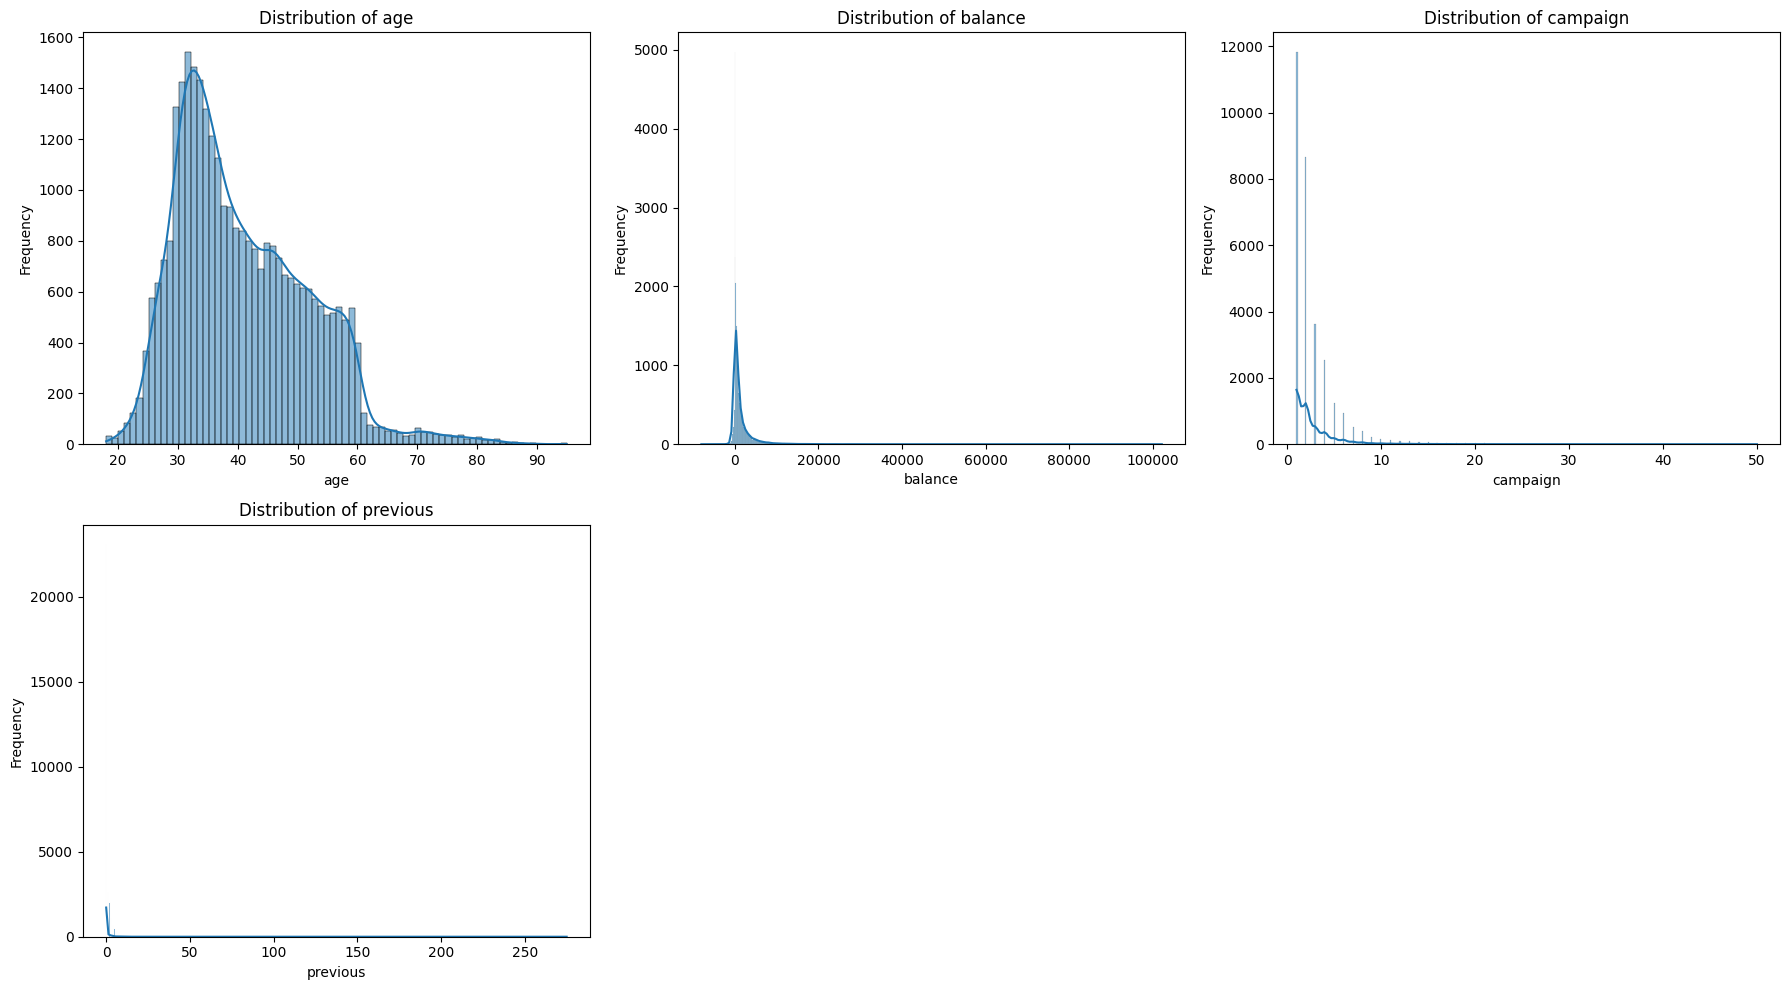

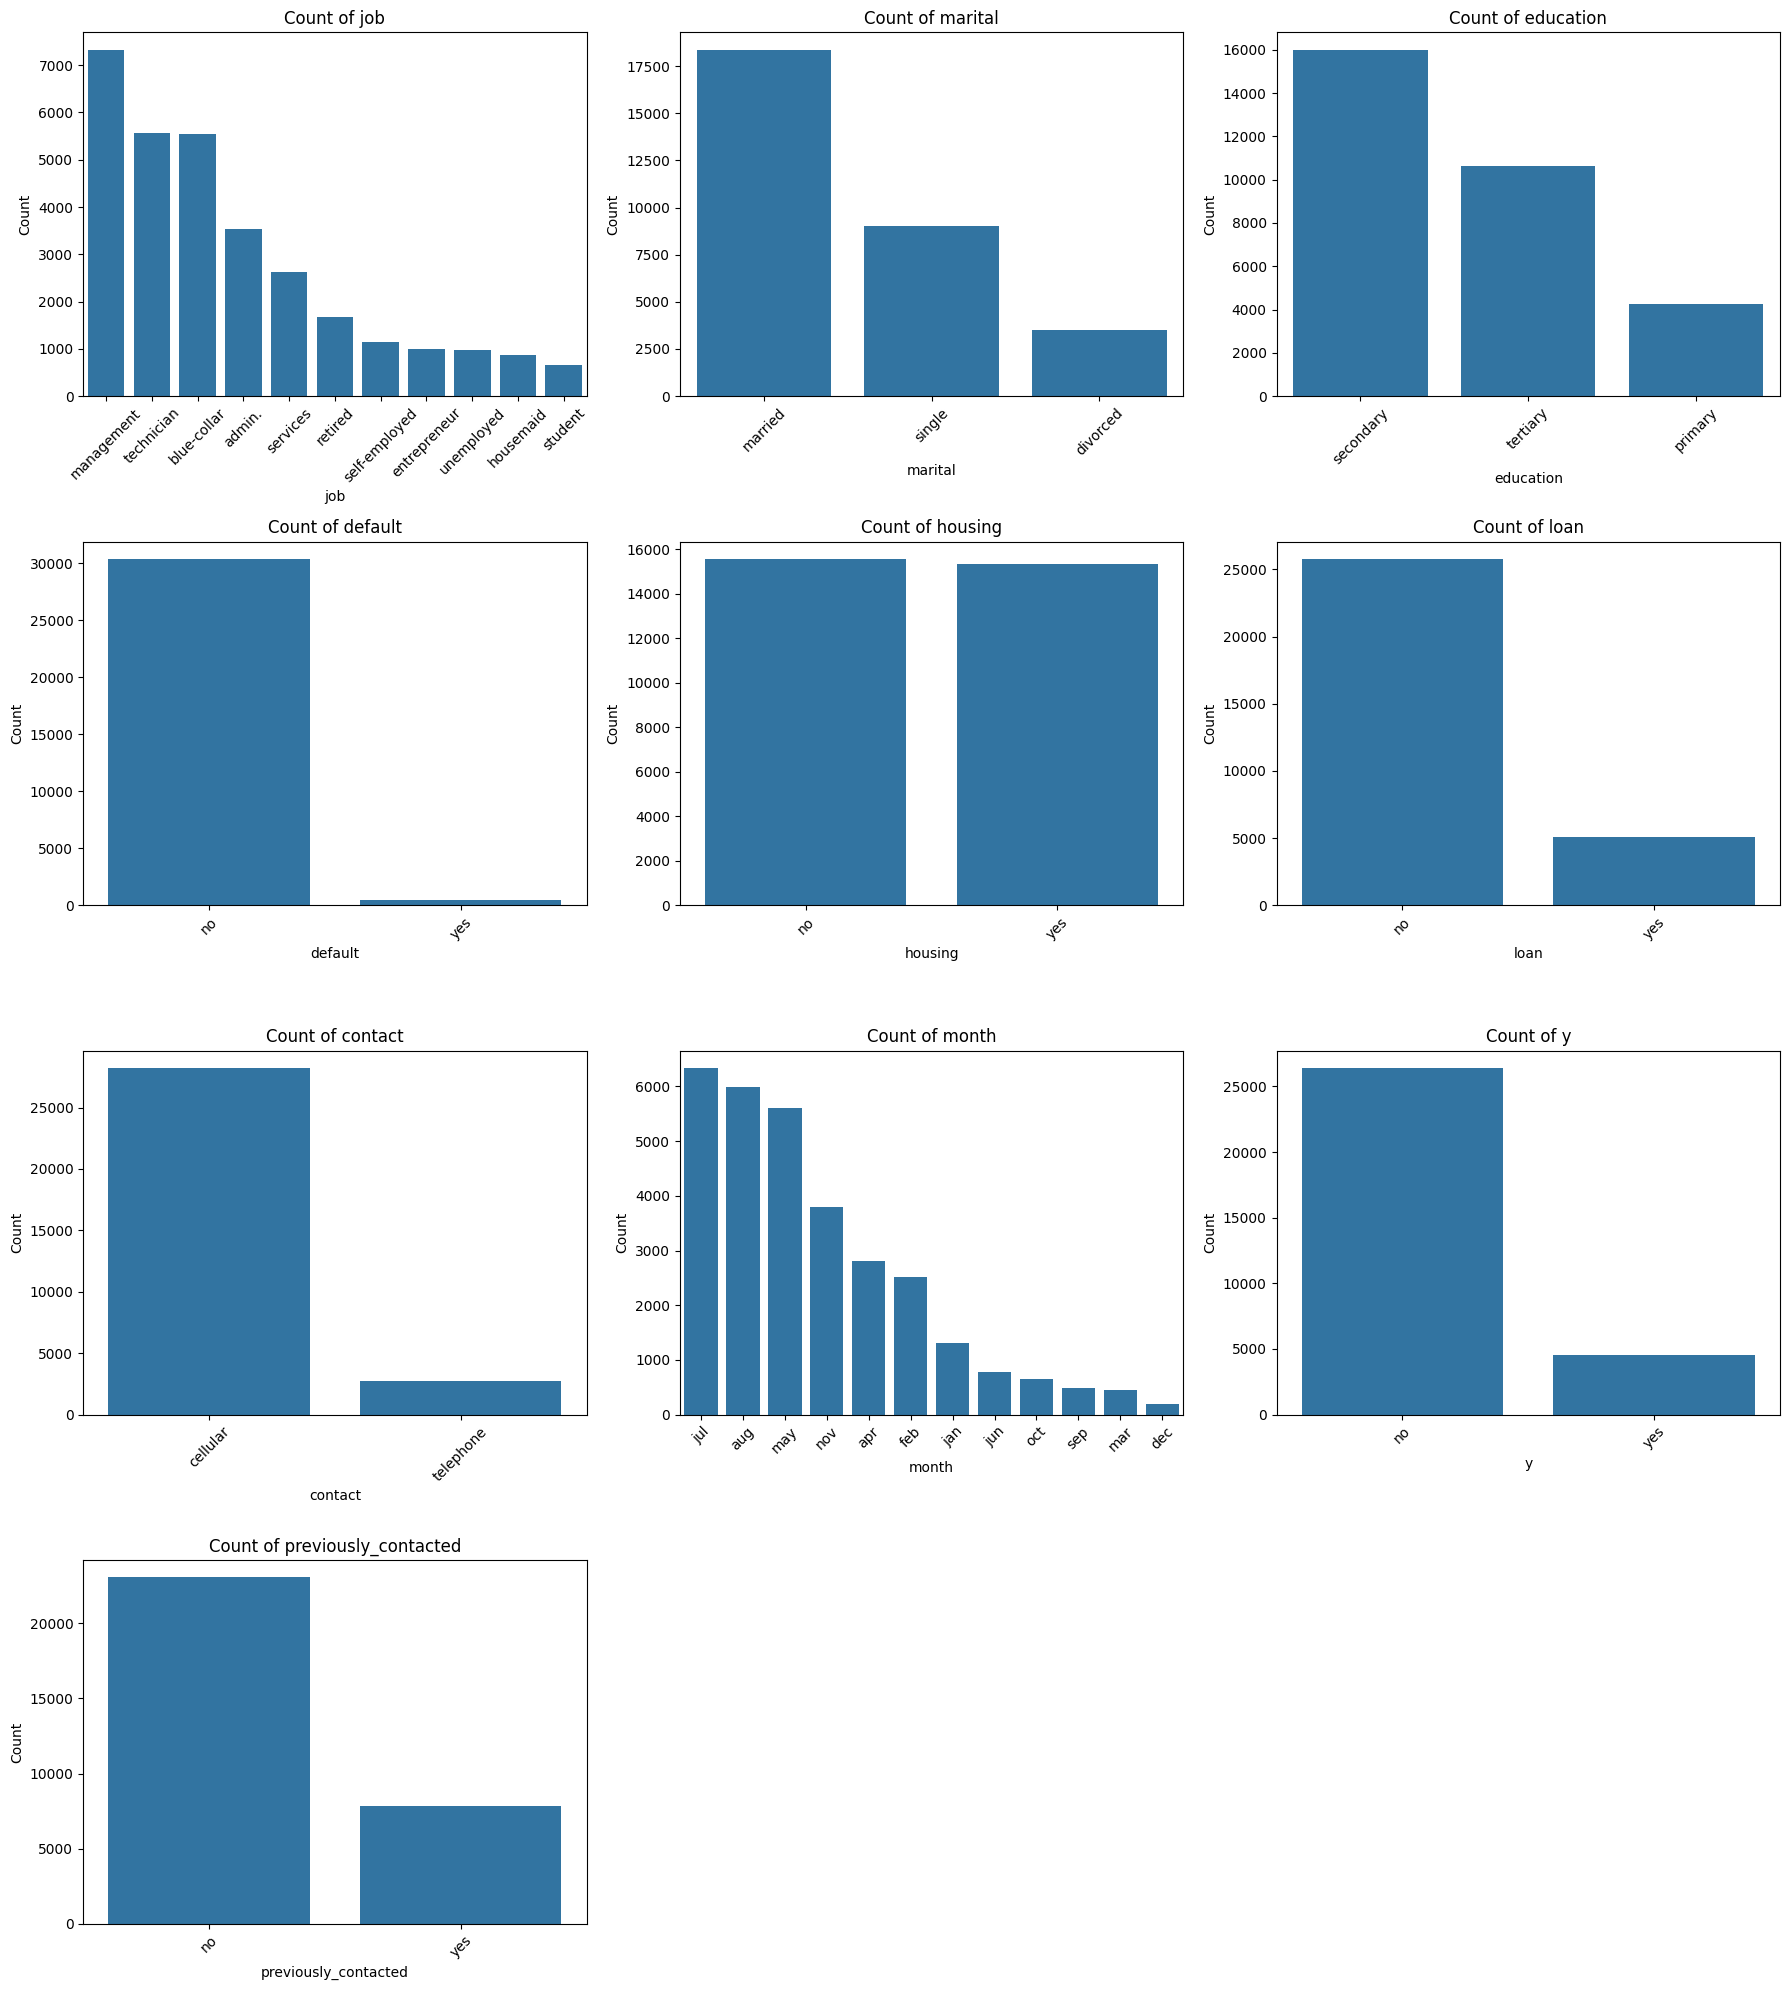

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#get numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

#plot histograms for numerical columns
if not numerical_cols.empty:
    num_plots = len(numerical_cols)
    num_rows = (num_plots + 2) // 3 #3 plots per row
    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    #hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

#plot countplots for categorical columns
if not categorical_cols.empty:
    num_plots = len(categorical_cols)
    num_rows = (num_plots + 2) // 3 #3 plots per row
    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(categorical_cols):
        sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)
        axes[i].set_title(f'Count of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

### bivariate analysis

Generate box plots for numerical columns against the target variable 'y' to visualize their relationship.


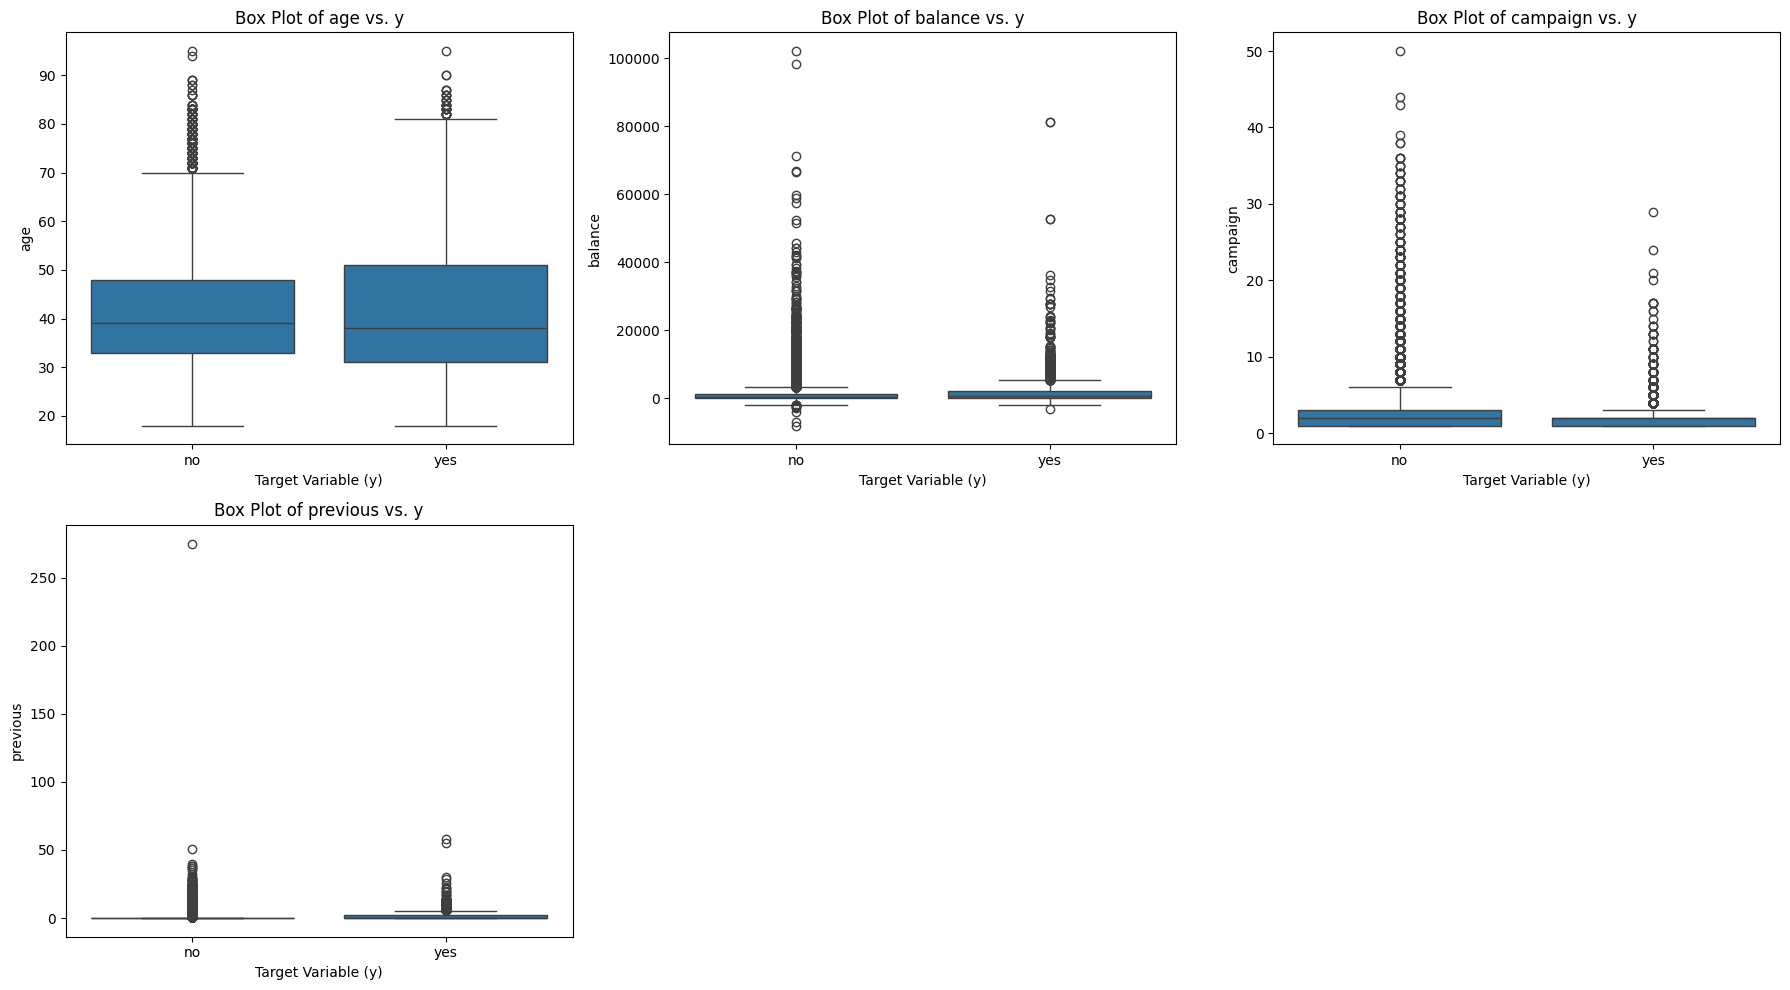

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#get numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

#plot box plots for numerical columns against 'y'
if not numerical_cols.empty:
    num_plots = len(numerical_cols)
    num_rows = (num_plots + 2) // 3  #3 plots per row
    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        sns.boxplot(data=df, x='y', y=col, ax=axes[i])
        axes[i].set_title(f'Box Plot of {col} vs. y')
        axes[i].set_xlabel('Target Variable (y)')
        axes[i].set_ylabel(col)

    #hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

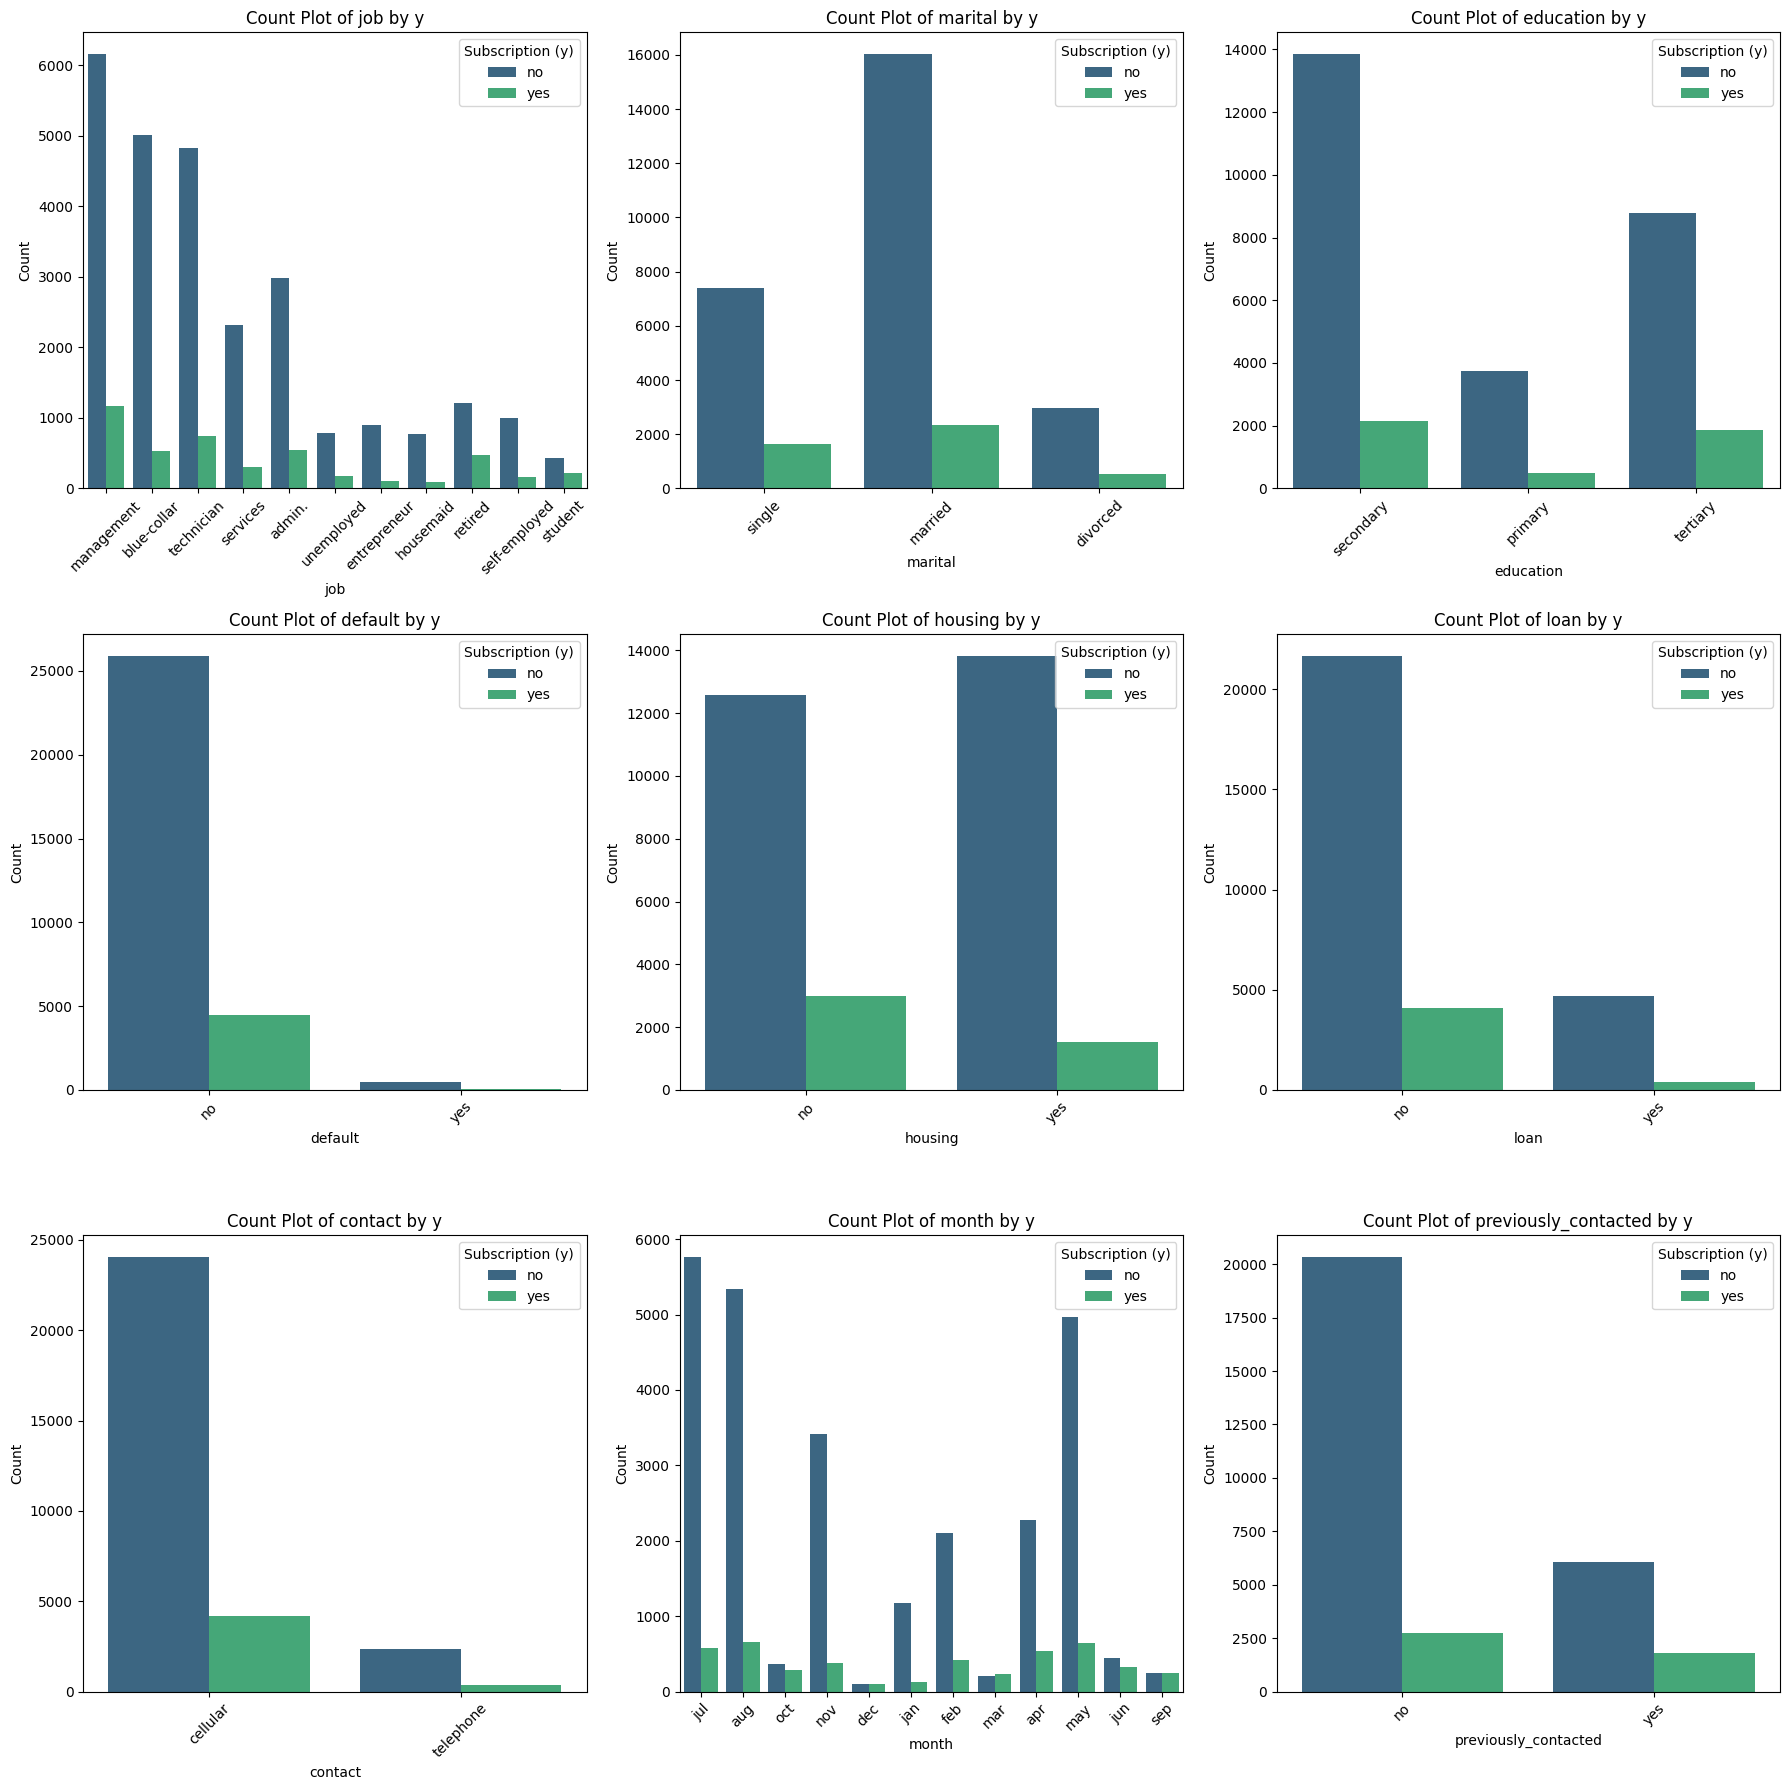

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#get categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

#exclude 'y' from categorical columns
categorical_cols = [col for col in categorical_cols if col != 'y']

#plot count plots for categorical columns against 'y'
if categorical_cols:
    num_plots = len(categorical_cols)
    #calculate number of rows for the subplot grid (at least 1 row)
    num_rows = (num_plots + 2) // 3
    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(categorical_cols):
        sns.countplot(data=df, x=col, hue='y', ax=axes[i], palette='viridis')
        axes[i].set_title(f'Count Plot of {col} by y')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].legend(title='Subscription (y)')

    #hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

### Multivariate Analysis & Correlation

Plot a heatmap for numerical variables to visualize their inter-correlations.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#selecting numerical cols
num = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

numerical_df = df[num]

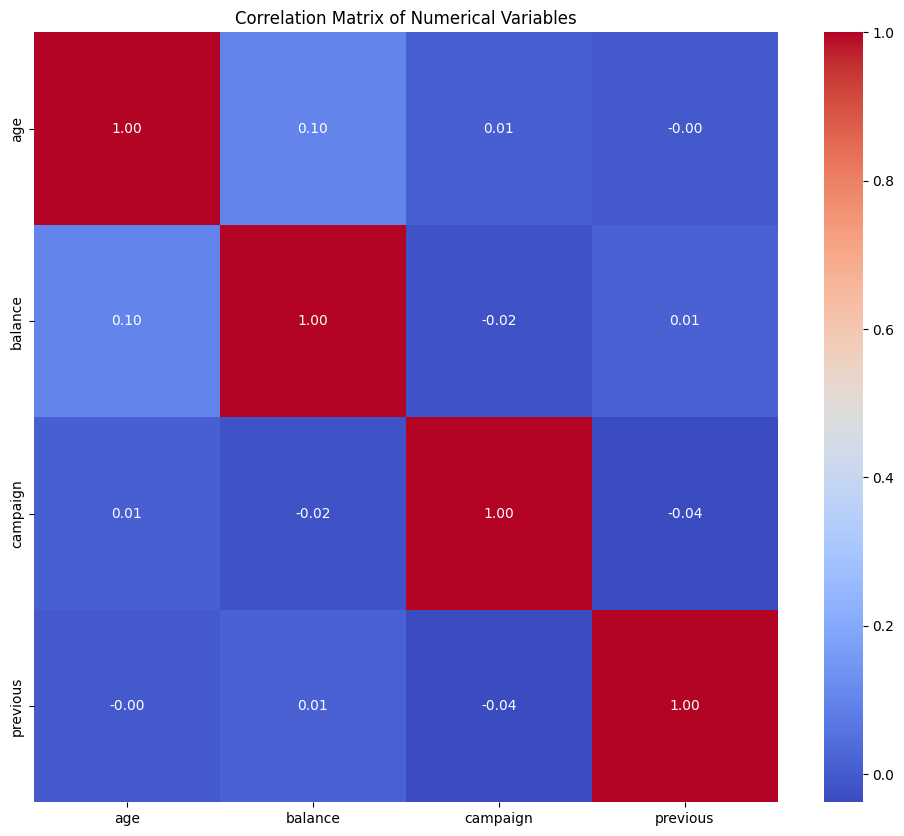

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#select only numerical columns
numerical_cols_for_corr = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

numerical_df_for_corr = df[numerical_cols_for_corr]

#calculate the correlation matrix
correlation_matrix = numerical_df_for_corr.corr()

#plot
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

###Logistic Regression

In [ ]:
# Logistic Regression – Baseline

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score
)

#removing unknowns
df = pd.read_csv('/content/bank_clean.csv')
for col in df.columns:
  df = df[df[col] != 'unknown']

#target: y (yes / no)
y = df["y"].map({"yes": 1, "no": 0})
X = df.drop(columns=["y"])

#one hot encode
X = pd.get_dummies(X, drop_first=True)

#train test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

#feature Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#LR model
log_reg = LogisticRegression(
    class_weight="balanced",
    max_iter=1000,
    solver="liblinear"
)

log_reg.fit(X_train_scaled, y_train)

#predictions (default threshold = 0.5)
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

#evaluation
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

ROC-AUC: 0.7213185322147115

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      5279
           1       0.30      0.61      0.40       903

    accuracy                           0.73      6182
   macro avg       0.61      0.68      0.62      6182
weighted avg       0.83      0.73      0.77      6182

Confusion Matrix:

[[3987 1292]
 [ 349  554]]


While logistic regression was used as a common baseline across the group, my implementation focused on interpreting model behaviour in the context of the bank’s call-or-not-call decision. Rather than immediately optimising performance metrics, I established a recall-oriented baseline and analysed its operational implications using confusion matrices and ROC–AUC. This approach provided a clear business justification for subsequent threshold tuning and comparison with a non-linear decision tree model, distinguishing my contribution from purely algorithmic optimisation.

Assumes that the combination of age and balance creates a unique effect.

Logic: A high balance might be "normal" for a 60-year-old but "extraordinary" for a 20-year-old. By multiplying them, you allow the Logistic Regression model to capture this synergy, which is a step toward mimicking how a Decision Tree thinks.

In [ ]:
#Logistic Regression – Feature Interaction Engineering (age x balance)

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score
)

#Removing unknowns
df = pd.read_csv('/content/bank_clean.csv')
for col in df.columns:
  df = df[df[col] != 'unknown']

#Target: y (yes / no)
y = df["y"].map({"yes": 1, "no": 0})
X = df.drop(columns=["y"])

#One hot encode
X = pd.get_dummies(X, drop_first=True)

# Create interaction term
X["balance_x_age"] = X["balance"] * X["age"]

#train test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

#Feature Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#LR Model
log_reg = LogisticRegression(
    class_weight="balanced",
    max_iter=1000,
    solver="liblinear"
)

log_reg.fit(X_train_scaled, y_train)

#Predictions (default threshold = 0.5)
y_prob_lr_int = log_reg.predict_proba(X_test_scaled)[:, 1]
y_pred_lr_int = log_reg.predict(X_test_scaled)

print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr_int))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_lr_int))
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_lr_int))

ROC-AUC: 0.7213023792846434

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      5279
           1       0.30      0.61      0.40       903

    accuracy                           0.74      6182
   macro avg       0.61      0.69      0.62      6182
weighted avg       0.83      0.74      0.77      6182

Confusion Matrix:

[[3994 1285]
 [ 349  554]]


Top Drivers for Subscription (Positive):
                     Feature  Coefficient  Abs_Coefficient
33  previously_contacted_yes     0.246879         0.246879
17        education_tertiary     0.184383         0.184383
28                 month_mar     0.164661         0.164661
27                 month_jun     0.139834         0.139834
32                 month_sep     0.124559         0.124559
31                 month_oct     0.116129         0.116129
8                job_retired     0.110222         0.110222
1                    balance     0.099095         0.099095
11               job_student     0.082621         0.082621
23                 month_dec     0.078965         0.078965

Top Barriers for Subscription (Negative):
              Feature  Coefficient  Abs_Coefficient
21  contact_telephone    -0.092502         0.092502
24          month_feb    -0.094102         0.094102
29          month_may    -0.163335         0.163335
20           loan_yes    -0.169162         0.169162
25     

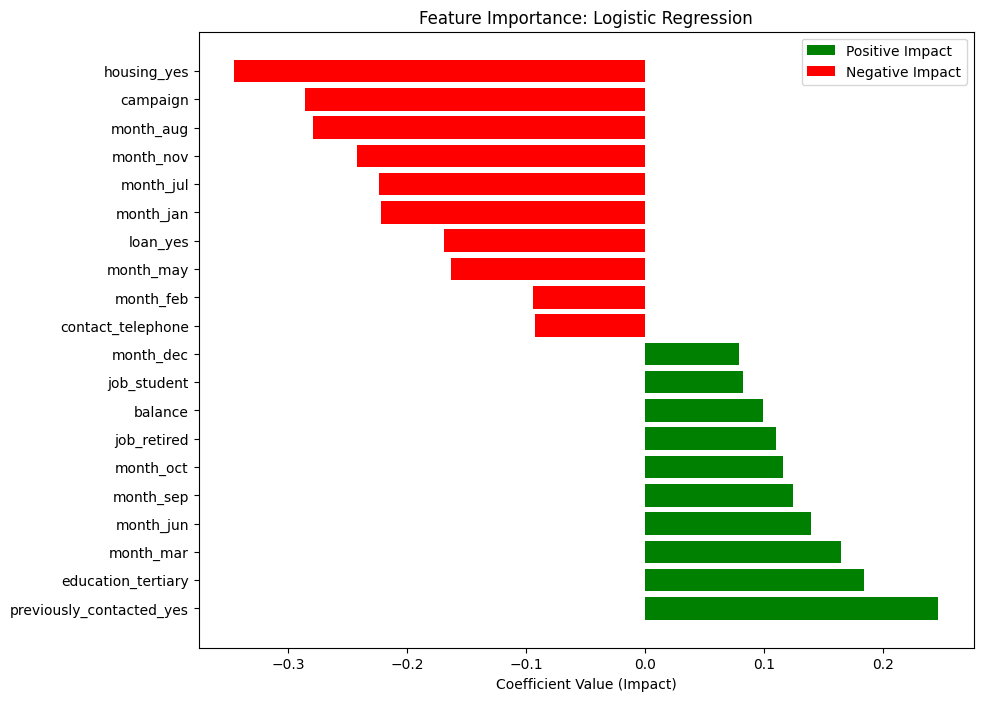

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Extract the coefficients
# .coef_[0] because Logistic Regression returns a 2D array for binary classification
coefficients = log_reg.coef_[0]

# 2. Map them to feature names
feature_names = X_train.columns

# 3. Create a DataFrame for easy viewing
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})

# 4. Sort by the actual coefficient value (to see positive vs negative impact)
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# 5. Display the top 10 and bottom 10
print("Top Drivers for Subscription (Positive):")
print(coef_df.head(10))

print("\nTop Barriers for Subscription (Negative):")
print(coef_df.tail(10))

# 6. Visualization
plt.figure(figsize=(10, 8))
plt.barh(coef_df['Feature'].head(10), coef_df['Coefficient'].head(10), color='green', label='Positive Impact')
plt.barh(coef_df['Feature'].tail(10), coef_df['Coefficient'].tail(10), color='red', label='Negative Impact')
plt.xlabel("Coefficient Value (Impact)")
plt.title("Feature Importance: Logistic Regression")
plt.legend()
plt.show()

### DT

Based on the business objective of reducing wasted calls and improving campaign efficiency, the Decision Tree model is primarily expected to identify threshold-based decision rules that distinguish high-probability subscribers from low-probability customers. In particular, financial and campaign-related variables such as account balance and number of contact attempts are expected to form early splits, reflecting practical call-or-not-call decisions. These conditional patterns are difficult to capture using logistic regression, which assumes linear and additive effects, but are naturally discovered by tree-based models.

In [ ]:
#Decision Tree
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score
)

#load data
#Removing unknowns
df = pd.read_csv('/content/bank_clean.csv')
for col in df.columns:
  df = df[df[col] != 'unknown']

y = df["y"].map({"yes": 1, "no": 0})
X = df.drop(columns=["y"])

# One-hot encode categoricals
X = pd.get_dummies(X, drop_first=True)

#tt split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42,
    stratify=y
)

#model
dt = DecisionTreeClassifier(
    max_depth=7,
    min_samples_leaf=30,
    class_weight="balanced",
    random_state=42
)

dt.fit(X_train, y_train)

#preds
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]

#eval
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test, y_pred))

ROC-AUC: 0.7085612836922326

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      5279
           1       0.34      0.51      0.41       903

    accuracy                           0.78      6182
   macro avg       0.62      0.67      0.64      6182
weighted avg       0.83      0.78      0.80      6182

Confusion Matrix:

[[4376  903]
 [ 441  462]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

configs = [
    {"max_depth": 5, "min_samples_leaf": 50},
    {"max_depth": 6, "min_samples_leaf": 50},
    {"max_depth": 7, "min_samples_leaf": 50},
    {"max_depth": 6, "min_samples_leaf": 30},
    {"max_depth": 7, "min_samples_leaf": 30},
]

results = []

for cfg in configs:
    dt = DecisionTreeClassifier(
        max_depth=cfg["max_depth"],
        min_samples_leaf=cfg["min_samples_leaf"],
        class_weight="balanced",
        random_state=42
    )

    dt.fit(X_train, y_train)
    y_prob = dt.predict_proba(X_test)[:, 1]
    y_pred = dt.predict(X_test)

    auc = roc_auc_score(y_test, y_prob)

    results.append({
        "max_depth": cfg["max_depth"],
        "min_samples_leaf": cfg["min_samples_leaf"],
        "roc_auc": auc
    })

    print("")
    print(f"Config: {cfg}")
    print("ROC-AUC:", round(auc, 4))
    print(classification_report(y_test, y_pred, digits=3))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Config: {'max_depth': 5, 'min_samples_leaf': 50}
ROC-AUC: 0.7002
              precision    recall  f1-score   support

           0      0.911     0.814     0.860      5279
           1      0.330     0.535     0.408       903

    accuracy                          0.773      6182
   macro avg      0.620     0.674     0.634      6182
weighted avg      0.826     0.773     0.794      6182

Confusion Matrix:
 [[4297  982]
 [ 420  483]]

Config: {'max_depth': 6, 'min_samples_leaf': 50}
ROC-AUC: 0.7035
              precision    recall  f1-score   support

           0      0.911     0.794     0.849      5279
           1      0.313     0.547     0.398       903

    accuracy                          0.758      6182
   macro avg      0.612     0.671     0.623      6182
weighted avg      0.824     0.758     0.783      6182

Confusion Matrix:
 [[4194 1085]
 [ 409  494]]

Config: {'max_depth': 7, 'min_samples_leaf': 50}
ROC-AUC: 0.7026
              precision    recall  f1-score   support

 

A small number of Decision Tree hyperparameters were tuned iteratively to balance model flexibility and interpretability. Increasing the tree depth moderately allowed the model to capture additional non-linear patterns while maintaining generalisability. The final model (max_depth = 7, min_samples_leaf = 30) achieved the strongest overall discrimination among tested configurations without evidence of overfitting.

the full Decision Tree is trained with a depth of 7, but only the top three levels are visualised to maintain interpretability and highlight the most influential decision rules.

###Visualizations

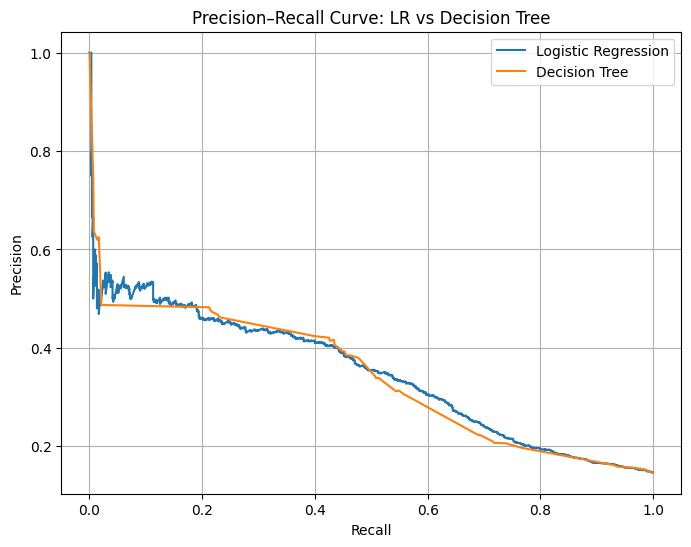

In [ ]:
#precision-recall curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate probabilities for Logistic Regression and Decision Tree
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]
y_prob_dt = dt.predict_proba(X_test)[:, 1]

# Precision–Recall values
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_prob_lr)
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_prob_dt)

plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, label="Logistic Regression")
plt.plot(recall_dt, precision_dt, label="Decision Tree")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve: LR vs Decision Tree")
plt.legend()
plt.grid(True)
plt.show()

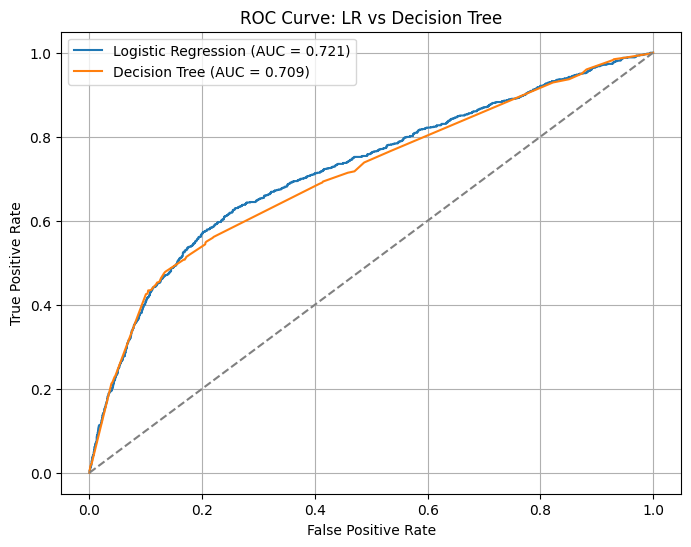

In [ ]:
#ROC curve (LR vs DT)
from sklearn.metrics import roc_curve, roc_auc_score

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

auc_lr = roc_auc_score(y_test, y_prob_lr)
auc_dt = roc_auc_score(y_test, y_prob_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.3f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: LR vs Decision Tree")
plt.legend()
plt.grid(True)
plt.show()

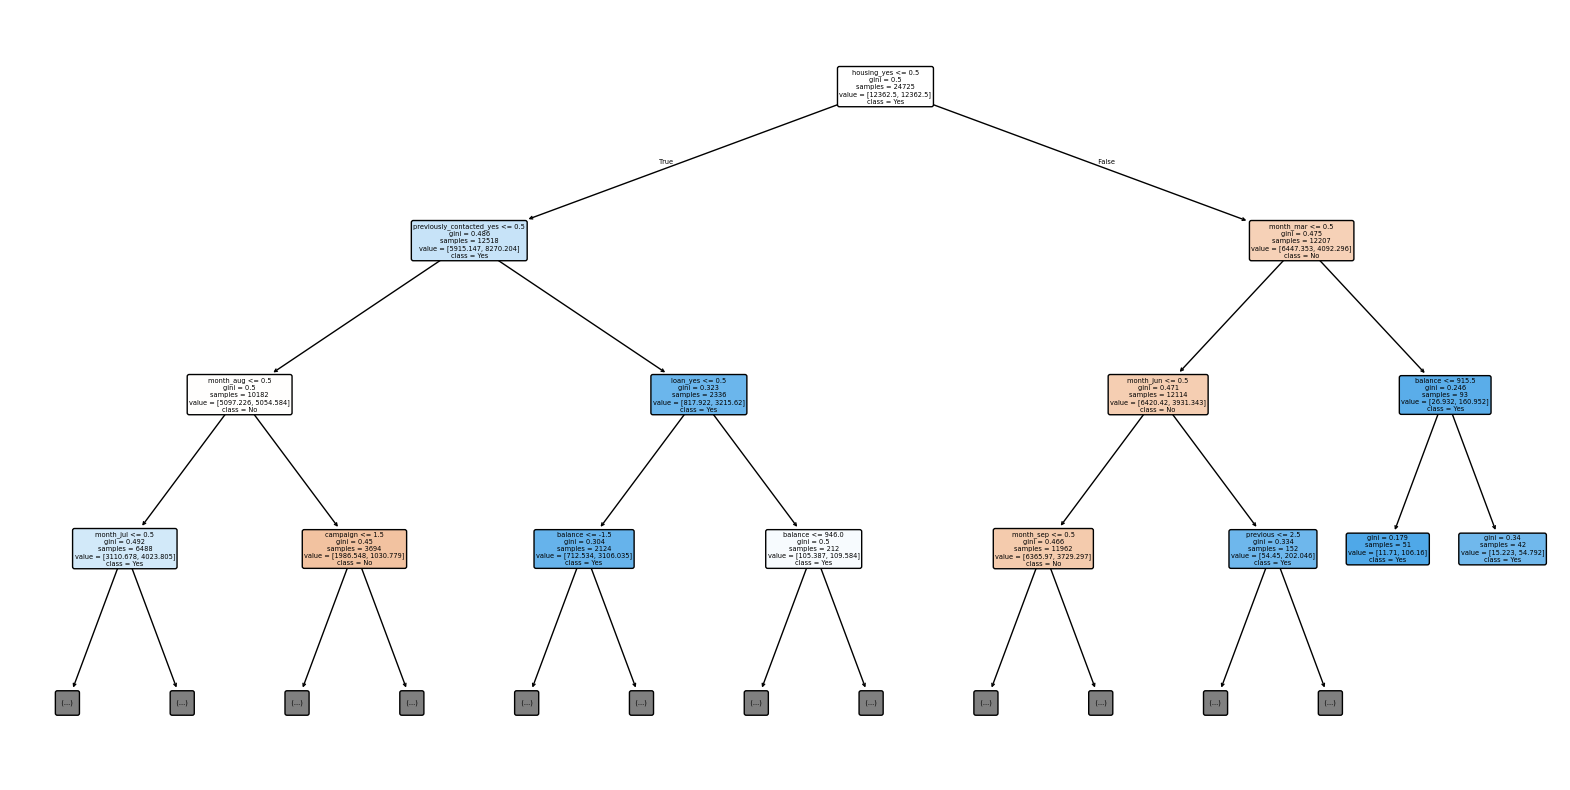

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    max_depth=3
)
plt.show()

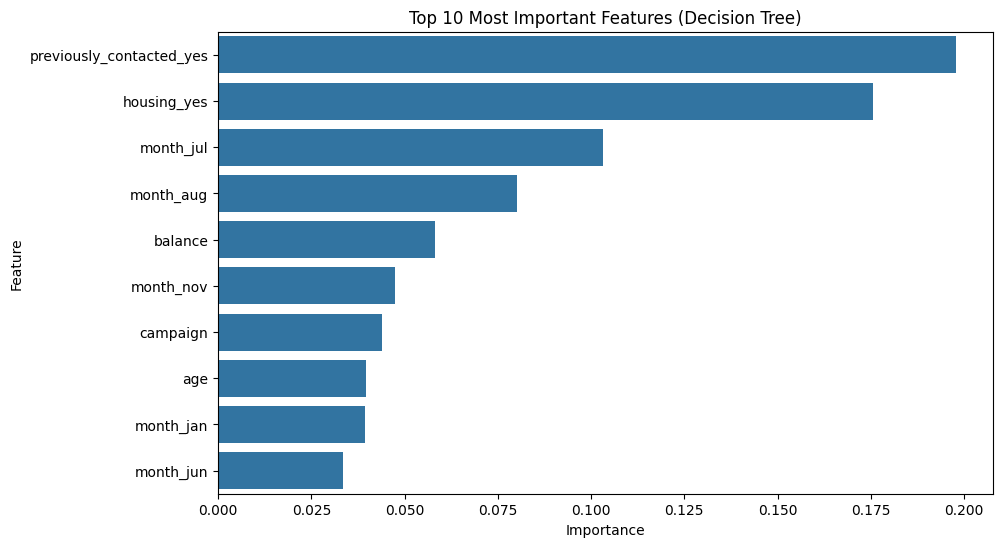

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importance scores
importances = dt.feature_importances_
feature_names = X_train.columns

#cereating a dataframe
dt_feat_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
dt_feat_importance = dt_feat_importance.sort_values(by='Importance', ascending=False)

#plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_feat_importance.head(10))
plt.title('Top 10 Most Important Features (Decision Tree)')
plt.show()